# Email/sms spam detaction system 

importing required libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import chardet, pathlib

raw = pathlib.Path("spam.csv").read_bytes()
enc  = chardet.detect(raw[:4096])["encoding"] # Detecting the encoding of the file
df   = pd.read_csv("spam.csv", encoding=enc)


In [3]:
df = pd.read_csv('spam.csv', encoding='Latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)# Renaming columns for better understanding
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])# Dropping unnecessary columns
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder # Encoding the labels from text to numbers 1 for ham and 0 for spam
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
print('ham=0,spam=1')

ham=0,spam=1


In [6]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

,0
label,0
text,0


In [8]:
df.shape

(5572, 2)

In [9]:
df.duplicated().sum()

np.int64(403)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.value_counts('label')

,count
label,
0,4516
1,653


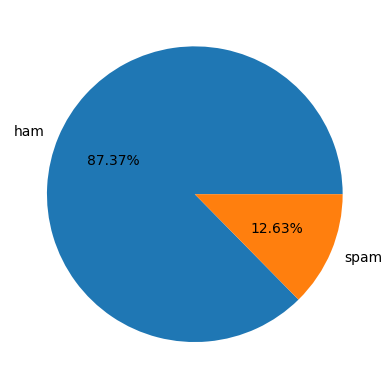

In [14]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%1.2f%%')
plt.show()

In [15]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
df['characters']=df['text'].apply(len)
df

,label,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [18]:
df['words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df.head()

,label,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,label,text,characters,words,sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['characters','words','sent']].describe()

,characters,words,sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['label']==0][['characters','words','sent']].describe()

,characters,words,sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['label']==1][['characters','words','sent']].describe()

,characters,words,sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

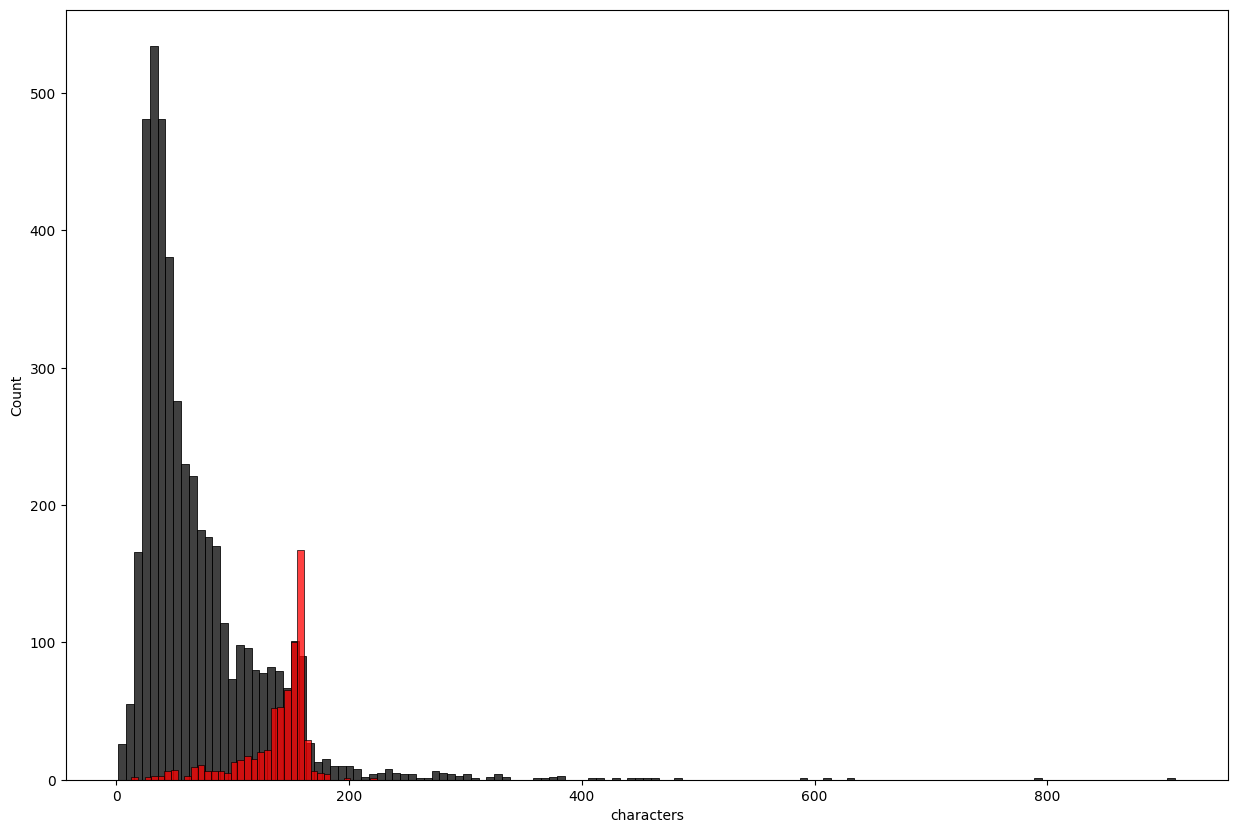

In [25]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['label']==0]['characters'],color='black')
sns.histplot(df[df['label']==1]['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

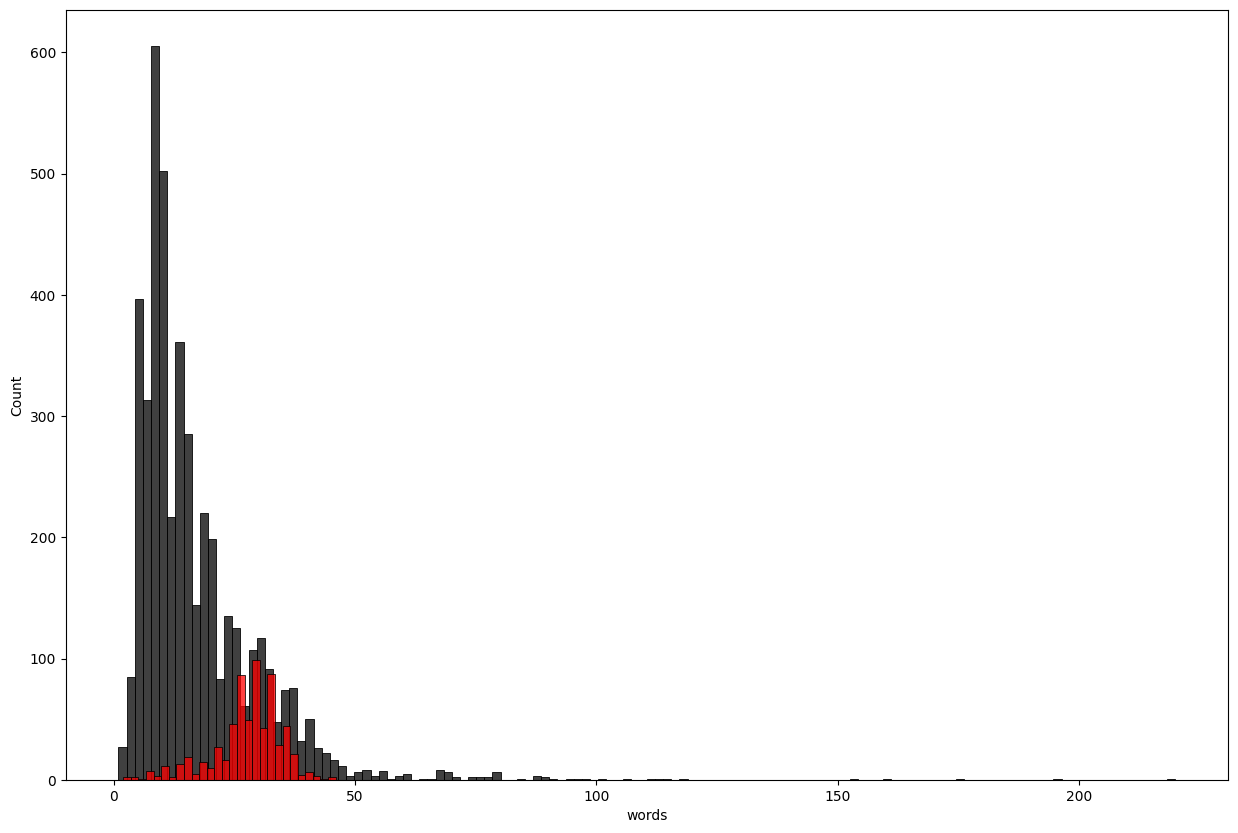

In [26]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['label']==0]['words'],color='black')
sns.histplot(df[df['label']==1]['words'],color='red')

<Axes: xlabel='sent', ylabel='Count'>

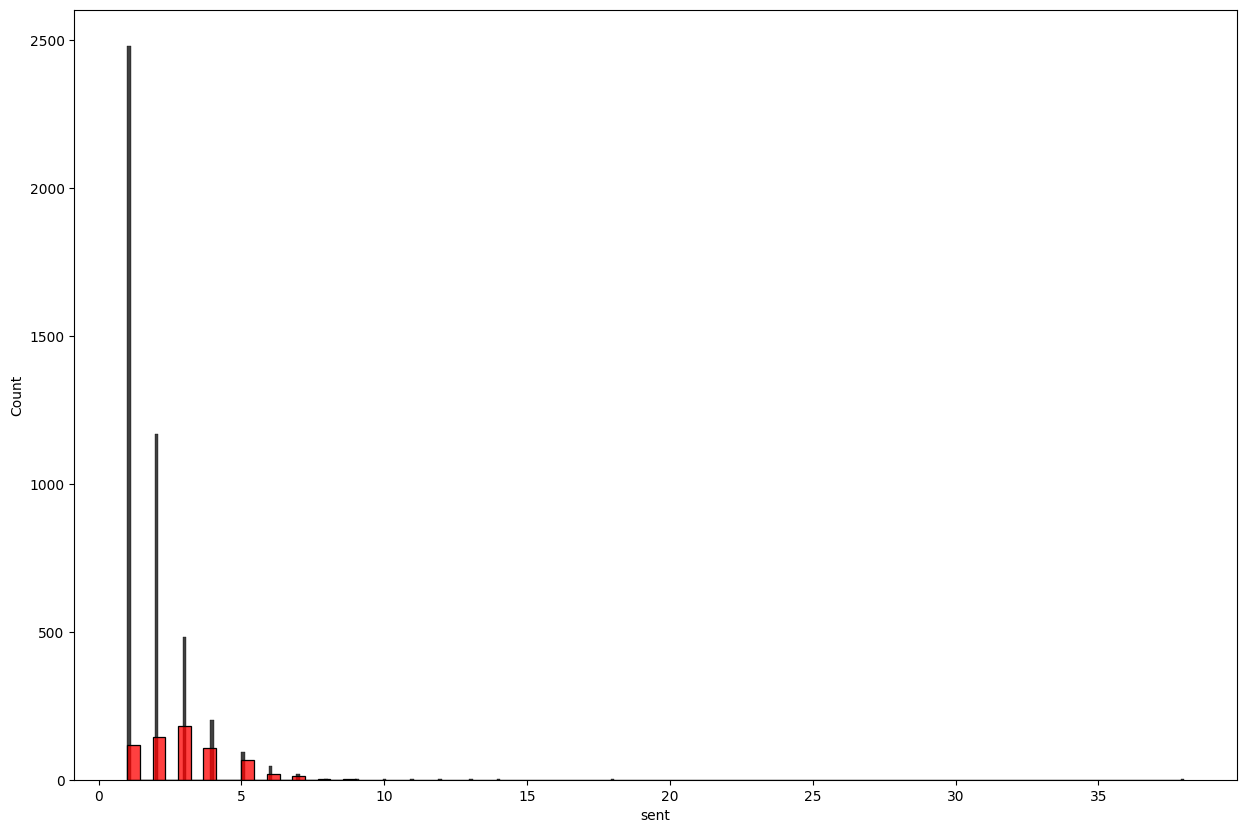

In [27]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['label']==0]['sent'],color='black')
sns.histplot(df[df['label']==1]['sent'],color='red')

<Axes: >

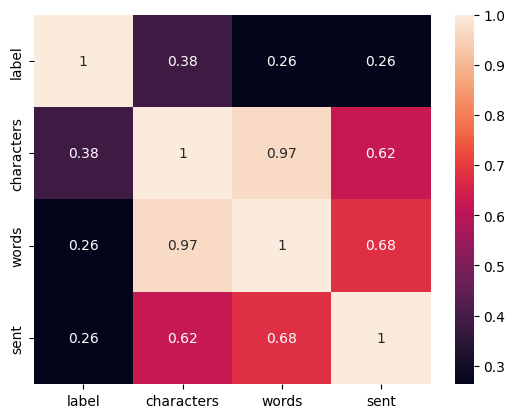

In [28]:
sns.heatmap(df[['label', 'characters', 'words', 'sent']].corr(), annot=True)

In [29]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [32]:
from tkinter.constants import Y
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)


  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [33]:
transform_text("GOOd moErning mera namee Is akran ")

'good moern mera name akran'

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)
df

,label,text,characters,words,sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
from os import sep
spam_wc = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))


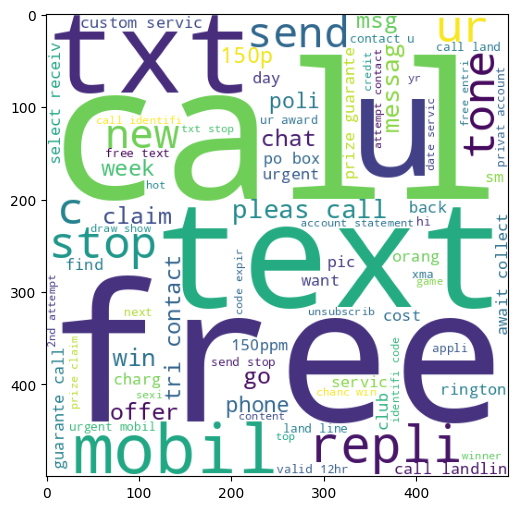

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
ham_wc = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))

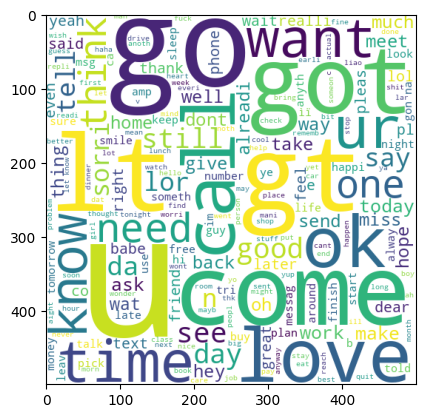

In [39]:
plt.imshow(ham_wc)

In [40]:
spam_corpus = []
for msg in df[df['label']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [41]:
len(spam_corpus)

9939

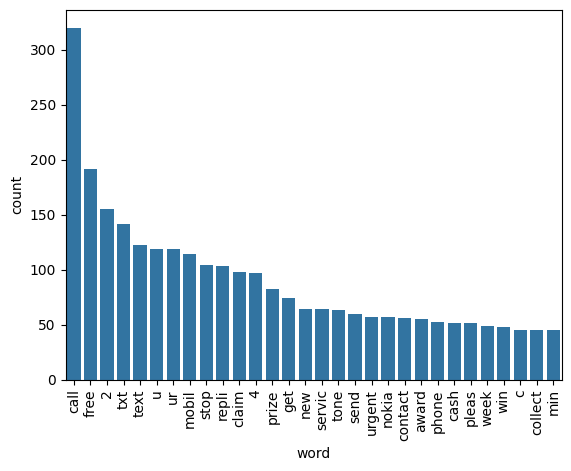

In [42]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['label']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [44]:
len(ham_corpus)

35404

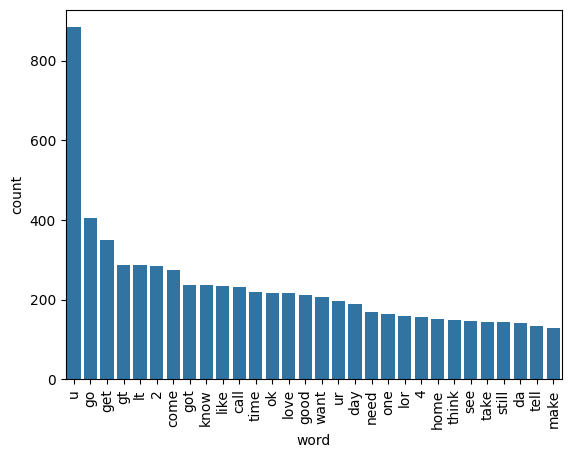

In [45]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [48]:
X.shape

(5169, 2500)

In [49]:
y = df['label'].values

In [50]:
y.shape

(5169,)

In [51]:
from sklearn.model_selection import  train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [54]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [55]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8626692456479691
0.4911504424778761
[[781 115]
 [ 27 111]]
0.6098901098901099


In [56]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9738878143133463
1.0
[[896   0]
 [ 27 111]]
0.891566265060241


In [57]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9845261121856866
0.9919354838709677
[[895   1]
 [ 15 123]]
0.9389312977099237


In [58]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [59]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knn = KNeighborsClassifier(n_neighbors=10)
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,criterion='gini',random_state=2)

In [60]:
clfs ={
    'SVC':svc,
    'KN':knn,
    'MNB':mnb,
    'BNB':bnb,
    'GNB':gnb,
    'RFC':rfc,
    'ETC':etc
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  return accuracy,precision,f1

In [62]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406, 0.8984375)

In [63]:
acc_scores = []
prec_scores = []
f1_scr = []
for name,clf in clfs.items():
  current_accuracy,current_precision,current_f1 = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("for",name)
  print("Acurracy - ",current_accuracy)
  print("precision - ",current_precision)
  print("F1 - ",current_f1)

  acc_scores.append(current_accuracy)
  prec_scores.append(current_precision)
  f1_scr.append(current_f1)

for SVC
Acurracy -  0.9748549323017408
precision -  0.9745762711864406
F1 -  0.8984375
for KN
Acurracy -  0.8839458413926499
precision -  1.0
F1 -  0.23076923076923078
for MNB
Acurracy -  0.9738878143133463
precision -  1.0
F1 -  0.891566265060241
for BNB
Acurracy -  0.9845261121856866
precision -  0.9919354838709677
F1 -  0.9389312977099237
for GNB
Acurracy -  0.8626692456479691
precision -  0.4911504424778761
F1 -  0.6098901098901099
for RFC
Acurracy -  0.9748549323017408
precision -  0.9827586206896551
F1 -  0.8976377952755905
for ETC
Acurracy -  0.9777562862669246
precision -  0.967479674796748
F1 -  0.9118773946360154


In [64]:
performance_df = pd.DataFrame({'Accuracy':acc_scores,'Precision':prec_scores,'F1':f1_scr},index=clfs.keys())

In [65]:
print(performance_df)

     Accuracy  Precision        F1
SVC  0.974855   0.974576  0.898438
KN   0.883946   1.000000  0.230769
MNB  0.973888   1.000000  0.891566
BNB  0.984526   0.991935  0.938931
GNB  0.862669   0.491150  0.609890
RFC  0.974855   0.982759  0.897638
ETC  0.977756   0.967480  0.911877


In [66]:
print(performance_df)

     Accuracy  Precision        F1
SVC  0.974855   0.974576  0.898438
KN   0.883946   1.000000  0.230769
MNB  0.973888   1.000000  0.891566
BNB  0.984526   0.991935  0.938931
GNB  0.862669   0.491150  0.609890
RFC  0.974855   0.982759  0.897638
ETC  0.977756   0.967480  0.911877


In [67]:
performance_df

,Accuracy,Precision,F1
SVC,0.974855,0.974576,0.898438
KN,0.883946,1.000000,0.230769
MNB,0.973888,1.000000,0.891566
BNB,0.984526,0.991935,0.938931
GNB,0.862669,0.491150,0.609890
RFC,0.974855,0.982759,0.897638
ETC,0.977756,0.967480,0.911877


In [68]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
